In [21]:
import importlib
import targetexplore

importlib.reload(targetexplore)
importlib.reload(targetexplore.gaia)
importlib.reload(targetexplore.targets)

<module 'targetexplore.targets' from '/datax/users/obs/osea/seticore/python/targetexplore/targets.py'>

In [22]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
from targetexplore import Targets, random_pointings

def random_pointings(n, ra_lims=[0, 360], dec_lims=[-90, 90], seed=None, return_targets=False, **kwargs):
    np.random.seed(seed)
    ra = np.random.uniform(0, 360, n)
    dec = np.arcsin(np.random.uniform(-1, np.sqrt(2)/2, n)) * (180 / np.pi)
    coords = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame='icrs')
    if return_targets: return Targets(coords, **kwargs)
    return coords

In [71]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np


In [62]:
tgts = Targets(
    coords,
    telescope="MeerKAT", band="5b",
    quality_cut="distance_gspphot > 0 and (distance_gspphot_upper - distance_gspphot_lower) / distance_gspphot < .2",
    query=True
)

INFO: Query finished. [astroquery.utils.tap.core]


In [72]:
len(tgts)

7917

/datax/users/obs/osea/seticore/python/targetexplore/_utils/conversion.py:8: RuntimeWarning: divide by zero encountered in divide
  return c / (D * theta_FOV / 1.22) / 1e9


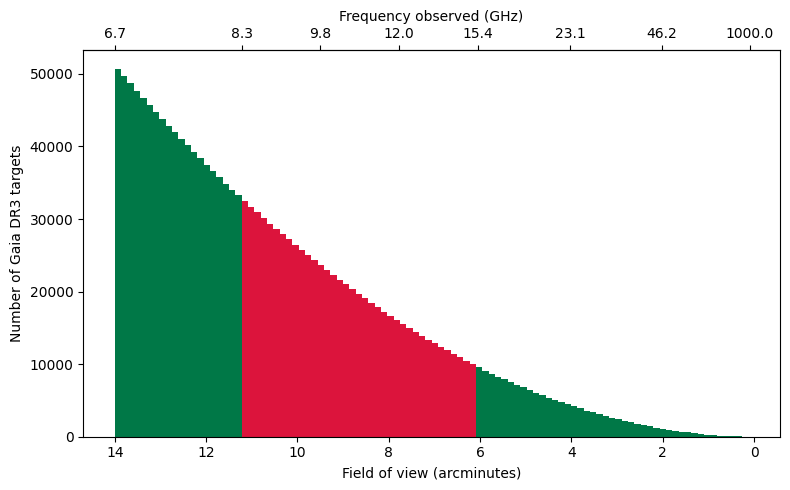

In [32]:
tgts.hist_separation()

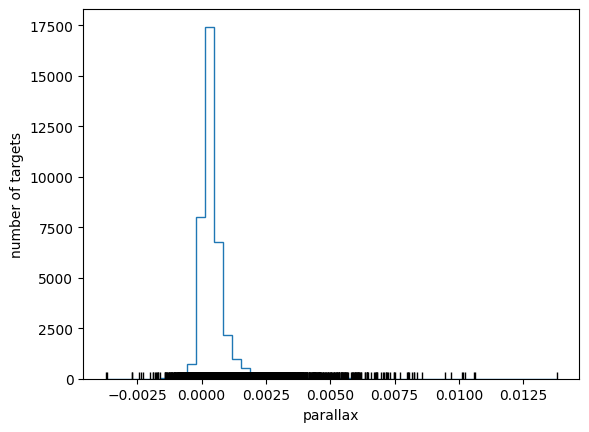

In [33]:
tgts.hist_parallax();

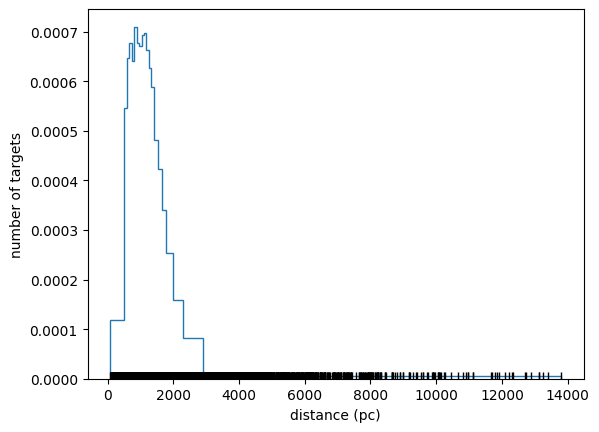

In [34]:
tgts.hist_distance(bins=1/20);

/datax/users/obs/osea/seticore/python/targetexplore/targets.py:298: RuntimeWarning: invalid value encountered in log10
  @property


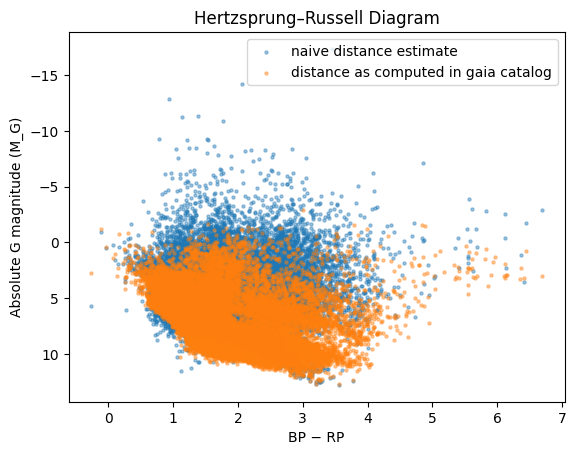

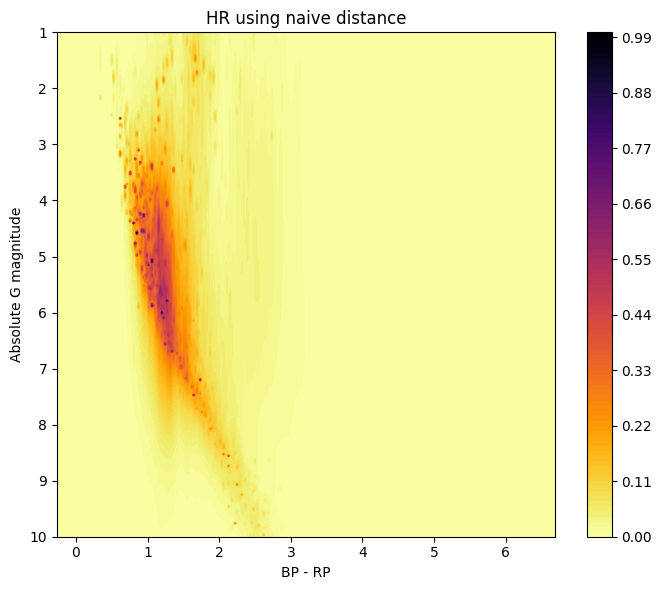

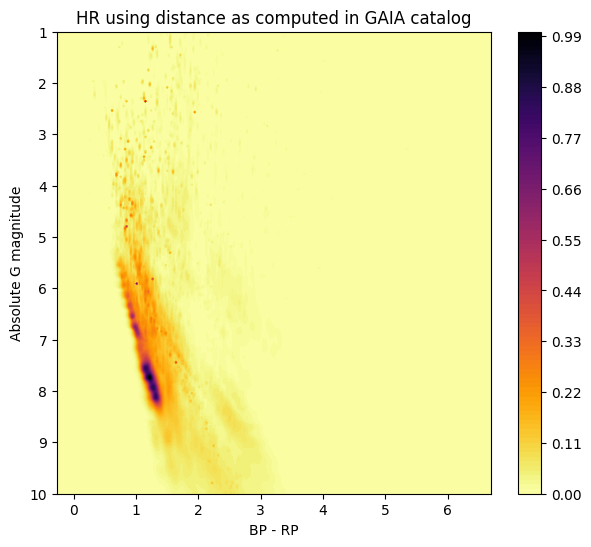

In [35]:
tgts.hr(cmap="inferno_r", heatmap=True, bayes=False);

# Time observation estimates

In [53]:
n_pointings = (
    365 * # days in a year
    24 *  # hours in a day
    2     # 30-minute observations in an hour
)
n_pointings

17520

This is the number of pointings expected in a year, if we account for 30 minute observations. Since many pointings will be repeated and there may be maintainance and other variables, I will use an approximation of 10000 pointings per year, and if I approximate the year to be composed of 52 weeks, I get

In [73]:
n_pointings = int(np.round(n_pointings / 52))
n_pointings

337

pointings per week

In [74]:
tgts = random_pointings(
    n_pointings,
    return_targets=True,
    telescope="MeerKAT", band="5b",
    quality_cut="distance_gspphot > 0 and (distance_gspphot_upper - distance_gspphot_lower) / distance_gspphot < .2",
)

INFO: Query finished. [astroquery.utils.tap.core]


In [91]:
tgts.gaia_dist[0][len(tgts)//2]

np.float32(1778.9619)

In [100]:
distances = tgts.gaia_dist[0]